# **Hand Written Digit Prediction**

## **Objective**

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these array to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

## **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

## **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

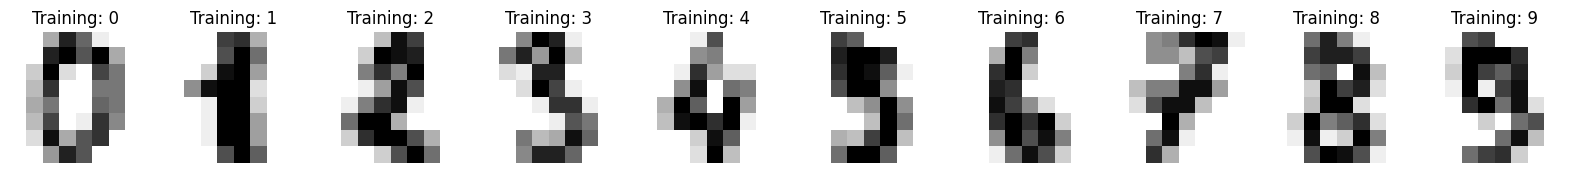

In [8]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## **Data Preprocessing**

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

In [12]:
len(df.images)

1797

In [13]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

## **Scaling Image Data**

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split Data**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.2)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

## **Random Forest Model**

In [28]:
rf = RandomForestClassifier()

In [29]:
rf.fit(x_train, y_train)

RandomForestClassifier()

## **Predict Test Data**

In [30]:
y_pred = rf.predict(x_test)

In [31]:
y_pred

array([2, 3, 0, 7, 6, 6, 2, 9, 9, 1, 8, 9, 6, 3, 7, 5, 5, 3, 5, 0, 4, 5,
       7, 8, 5, 4, 8, 7, 4, 1, 8, 8, 0, 8, 2, 2, 2, 2, 1, 5, 4, 3, 0, 4,
       6, 4, 2, 3, 3, 6, 4, 1, 2, 7, 8, 7, 8, 4, 8, 6, 9, 8, 2, 1, 8, 1,
       5, 1, 8, 9, 2, 4, 1, 4, 1, 9, 1, 5, 6, 5, 8, 2, 0, 9, 8, 5, 0, 7,
       5, 8, 6, 8, 5, 8, 9, 6, 3, 0, 8, 2, 8, 7, 6, 0, 6, 0, 8, 0, 1, 6,
       7, 1, 6, 7, 1, 3, 8, 8, 5, 7, 9, 1, 2, 7, 2, 4, 6, 5, 1, 4, 2, 1,
       6, 4, 8, 4, 9, 2, 2, 9, 4, 3, 2, 2, 9, 4, 1, 9, 0, 6, 7, 4, 9, 8,
       2, 3, 6, 3, 7, 0, 1, 4, 5, 5, 2, 7, 5, 0, 6, 8, 1, 0, 3, 8, 4, 8,
       3, 6, 1, 4, 2, 5, 2, 4, 9, 7, 1, 9, 2, 1, 6, 6, 5, 5, 3, 9, 3, 3,
       3, 2, 9, 4, 3, 5, 2, 6, 8, 4, 6, 8, 8, 1, 9, 1, 6, 4, 2, 3, 8, 9,
       6, 5, 0, 4, 2, 3, 4, 0, 9, 1, 7, 8, 4, 3, 9, 7, 6, 1, 3, 1, 0, 7,
       7, 1, 1, 6, 2, 3, 0, 2, 0, 7, 8, 8, 9, 5, 4, 0, 2, 3, 0, 9, 9, 1,
       3, 1, 7, 8, 2, 2, 3, 8, 9, 1, 2, 6, 2, 5, 5, 6, 6, 5, 1, 9, 3, 8,
       9, 4, 3, 1, 2, 7, 0, 7, 9, 3, 5, 5, 9, 0, 0,

## **Model Accuracy**

In [34]:
confusion_matrix(y_test, y_pred)

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 34,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        42
           3       1.00      0.94      0.97        36
           4       1.00      0.97      0.99        36
           5       0.97      0.94      0.95        33
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        30
           8       1.00      0.98      0.99        43
           9       0.93      1.00      0.96        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

